# Chapter4 応用技術

## 4.1 
> インターネット上のテキストをいくつかダウンロードし, ごく小規模なコーパスを作ってみよう. それらの文書に対して形態素解析を行い, いずれかの文書に含まれる単語のTF-TDFを計算してみよう.

In [2]:
import numpy as np
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from collections import defaultdict

In [3]:
neko = requests.get('https://nlp100.github.io/data/neko.txt').text
nlp = spacy.load('ja_ginza')
nekos = neko.split("\r\n\r\n")

In [4]:
docs = []
for i in nekos:
    if len(i) < 10:
        continue
    docs.append(" ".join([j.text for j in nlp(i)]))

In [5]:
len(docs)

698

In [6]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)
print(X.shape)

(698, 12651)


In [25]:
words = vectorizer.get_feature_names_out()
idx = np.where(words == "主人")[0][0]
for _ in range(1):
    i = np.random.randint(0, len(docs))
    print(X[i, idx], docs[i])

0.0 「 面白い です な 」 と 寒月 が にやにや し ながら 云う 。


## 4.2
> 4.1で計算したTF-IDFをもとに, ある二つのテキストの余弦類似度を計算してみよう.

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

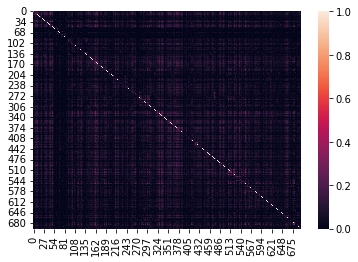

In [30]:
similarity = cosine_similarity(X, X)
sns.heatmap(similarity)
plt.show()

In [49]:
# get most similar pair
max_idx = np.where(abs(similarity - 1.0) < 10e-4, -1.0, similarity).argmax() 
(i, j) = np.unravel_index(max_idx, similarity.shape)

In [47]:
print(docs[idx[i]])

「 大和魂 ！ 　 と 新聞屋 が 云う 。 
 大和魂 ！ 　 と 掏摸 が 云う 。 
 大和魂 が 一躍 し て 海 を 渡っ た 。 
 英国 で 大和魂 の 演説 を する 。 
 独逸 で 大和魂 の 芝居 を する 」 
 「 なるほど こりゃ 天然 居士 以上 の 作 だ 」 と 今度 は 迷亭 先生 が そり返っ て 見せる 。


In [48]:
print(docs[idx[j]])

「 東郷 大将 が 大和魂 を 有っ て いる 。 
 肴屋 の 銀 さん も 大和魂 を 有っ て いる 。 
 詐偽 師 、 山師 、 人殺し も 大和魂 を 有っ て いる 」 
 「 先生 そこ へ 寒月 も 有っ て いる と つけ て 下さい 」 
 「 大和魂 は どんな もの か と 聞い たら 、 大和魂 さ と 答え て 行き 過ぎ た 。 
 五六 間 行っ て から エヘン と 云う 声 が 聞こえ た 」 
 「 その 一句 は 大出来 だ 。 
 君 は なかなか 文才 が ある ね 。 
 それ から 次 の 句 は 」 
 「 三角 な もの が 大和魂 か 、 四角 な もの が 大和魂 か 。 
 大和魂 は 名前 の 示す ごとく 魂 で ある 。 
 魂 で ある から 常 に ふらふら し て いる 」 
 「 先生 だいぶ 面白う ござい ます が 、 ちと 大和魂 が 多 過ぎ は し ませ ん か 」 と 東風 君 が 注意 する 。 
 「 賛成 」 と 云っ た の は 無論 迷亭 で ある 。


## 4.3
> 評価表現に対して否定表現が使われている際には極性が反転することがある. 否定表現を検出し, その場合は極性を反転させるようにリスト4.7のコードを改良してみよう.

In [58]:
from spacy import displacy

In [68]:
nlp = spacy.load('ja_ginza')
example = nlp("この本は面白い。あの本は面白くない。")

In [69]:
# we can use dependency, which can check from token.head, to reverse sentiment
displacy.render(example, style='dep')
for token in example:
    print(token.text, token.dep_, token.head)

この det 本
本 nsubj 面白い
は case 本
面白い ROOT 面白い
。 punct 面白い
あの det 本
本 nsubj 面白く
は case 本
面白く advcl ない
ない ROOT ない
。 punct ない


In [72]:
# However, it's difficult to apply simply 
failed_example = nlp("この本は面白いが、あの本は面白くない。")
displacy.render(failed_example, style='dep')
for token in failed_example:
    print(token.text, token.dep_, token.head)

この det 本
本 nsubj 面白い
は case 本
面白い advcl ない
が mark 面白い
、 punct 面白い
あの det 本
本 nsubj ない
は case 本
面白く advcl ない
ない ROOT ない
。 punct ない
